**Description**

The MNIST dataset, or Modified National Institute of Standards and Technology dataset, is a collection of handwritten digits used to train and test image classification systems

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
TF_DETERMINISTIC_OPS=1

# Set random seeds for reproducibility
random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)


**Import Data**

In [2]:
!git clone https://github.com/Rajlaxmi-giri/DL_Assignment.git

Cloning into 'DL_Assignment'...
remote: Enumerating objects: 25005, done.
remote: Total 25005 (delta 0), reused 0 (delta 0), pack-reused 25005 (from 1)
Receiving objects: 100% (25005/25005), 561.01 MiB | 29.60 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (25004/25004), done.


In [3]:
train_data=pd.read_csv('/content/DL_Assignment/Mnist_Digits_Recognition/Dataset/train.csv')
test_data=pd.read_csv('/content/DL_Assignment/Mnist_Digits_Recognition/Dataset/test.csv')

**Data prepration**

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dimensions of Dataset.**

In [6]:
train_data.shape

(42000, 785)

In [7]:
test_data.shape

(28000, 784)

**Information of the data**

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


**Fetching the Attributes Names**

In [10]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [11]:
test_data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [12]:
train_data.isnull().sum().any()

False

In [13]:
test_data.isnull().sum().any()

False

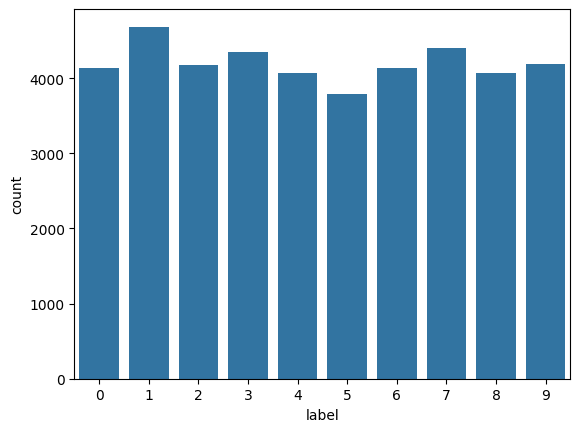

In [14]:
# plot distribution of digits
sns.countplot(x=pd.Series(train_data['label']))
plt.show()

In [15]:
X=train_data.drop('label',axis=1)
y=train_data['label']

In [16]:
test_X=test_data

In [17]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X.shape

(42000, 784)

In [19]:
test_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_X.shape

(28000, 784)

In [21]:
y.shape

(42000,)

**Reshaping Data**

In [22]:
X = X.values.reshape(-1,28,28,1)
test_X=test_X.values.reshape(-1,28,28,1)

In [23]:
X.shape

(42000, 28, 28, 1)

In [24]:
test_X.shape

(28000, 28, 28, 1)

**Normalization**
- Normalizing data to help with the training and testing

In [25]:
X=X/255
test_X=test_X/255

**One-hot encoding**

In [26]:
"""
# one-hot encoding using numpy
n_classes=10  # Number of classes(0-9 digits)
y = np.zeros((y.size, n_classes)) # Create a zero matrix
y[np.arange(y.size), y] = 1    #set 1 at the appropriate indices
print(y.shape)
"""
# one-hot encoding using keras

from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [27]:
y.shape

(42000, 10)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model building**
- CNN model

In [29]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


**Hypertuning the Model**

In [30]:
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=64, max_value=128, step=32),activation='relu' ))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[0.01, 0.001])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model


**Optimize Model**

In [31]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner = RandomSearch(build_model,objective='val_accuracy',max_trials = 5,directory='output1',project_name='mnist_cnn_model')


In [32]:
tuner.search(X_train,y_train,epochs=3,validation_data=(X_test, y_test))

Trial 5 Complete [00h 03m 18s]
val_accuracy: 0.9867857098579407

Best val_accuracy So Far: 0.9889285564422607
Total elapsed time: 00h 15m 43s


In [33]:
model=tuner.get_best_models(num_models=1)[0]

In [34]:
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]

In [35]:
print(f""" number of filters in the first conv layer is {best_params.get('conv_1_filters')}
number of filters in the second conv layer is {best_params.get('conv_2_filters')}.
size of the dense layer is {best_params.get('dense_units')}.
The best learning rate is {best_params.get('learning_rate')}.
""")

 number of filters in the first conv layer is 64
number of filters in the second conv layer is 64.
size of the dense layer is 128.
The best learning rate is 0.001.



In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,810 (956.29 KB)

 Trainable params: 244,810 (956.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

**Fitting Data**

In [38]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.9890 - loss: 0.0351 - val_accuracy: 0.9896 - val_loss: 0.0372
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9906 - loss: 0.0268 - val_accuracy: 0.9882 - val_loss: 0.0398
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.9906 - val_loss: 0.0342
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9882 - val_loss: 0.0449
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9951 - loss: 0.0143 - val_accuracy: 0.9876 - val_loss: 0.0516
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9900 - val_loss: 0.0417


In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.06%


In [40]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

In [41]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history=cnn_model.fit(X_train,y_train,epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.8143 - loss: 0.5676 - val_accuracy: 0.9785 - val_loss: 0.0676
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.9681 - loss: 0.1128 - val_accuracy: 0.9837 - val_loss: 0.0482
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9778 - loss: 0.0743 - val_accuracy: 0.9868 - val_loss: 0.0392
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9819 - loss: 0.0588 - val_accuracy: 0.9865 - val_loss: 0.0413
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9868 - loss: 0.0421 - val_accuracy: 0.9890 - val_loss: 0.0369
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.9884 - loss: 0.0357 - val_accuracy: 0.9899 - val_loss: 0.0360
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9904 -

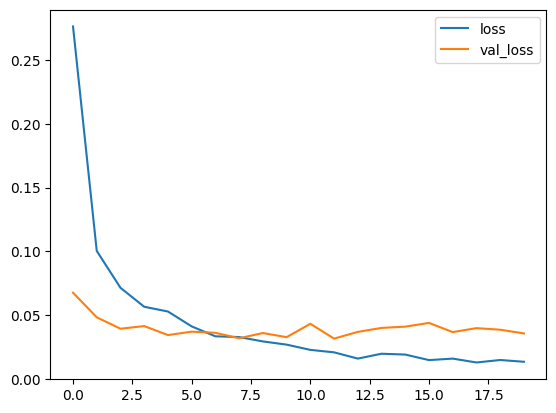

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

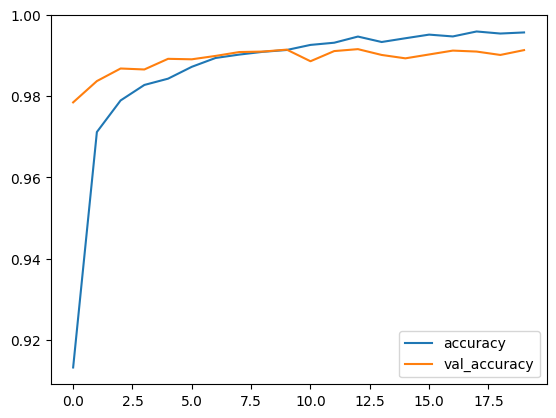

In [45]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [46]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.13%


**Data Augmentation**

In [47]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,)

datagen.fit(X_train)

In [48]:
History = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=64),
          validation_data=(X_test, y_test),
          epochs=20,
          callbacks=[early_stopping])

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - accuracy: 0.9362 - loss: 0.2229 - val_accuracy: 0.9920 - val_loss: 0.0239
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.9697 - loss: 0.1038 - val_accuracy: 0.9925 - val_loss: 0.0224
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.9730 - loss: 0.0929 - val_accuracy: 0.9929 - val_loss: 0.0235
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 81ms/step - accuracy: 0.9755 - loss: 0.0806 - val_accuracy: 0.9956 - val_loss: 0.0187
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.9760 - loss: 0.0771 - val_accuracy: 0.9938 - val_loss: 0.0191
Epoch 6/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9818 - loss: 0.0640 - val_accuracy: 0.9940 - val_loss: 0.0203
Epoch 7/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - accuracy: 0.9805 - loss: 0.0671 - val_accuracy: 0.9936 - val_loss: 0.0193


**Model Save**

In [50]:
cnn_model.save("try_model.h5")

In [ ]:
test_X.shape

(28000, 28, 28, 1)

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
test_cnn_model = load_model("try_model.h5")

In [ ]:
# Predict the test data
y_pred = model.predict(test_X)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
y_label = np.argmax(y_pred, axis=1)
print(y_label)


[2 0 9 ... 3 9 2]


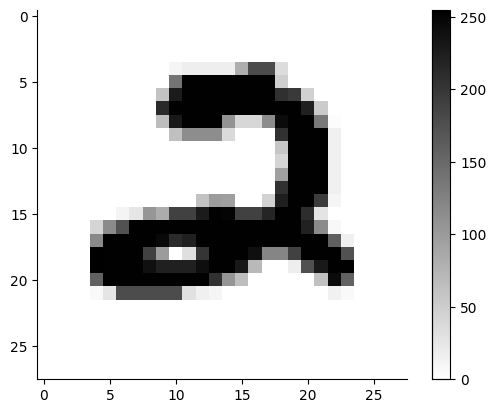

In [ ]:
digit = test_data.loc[0, 'pixel0':]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()


In [ ]:
sample_submission =  pd.DataFrame({
        "ImageId": test_data.index+1,
        "Label":y_label
    })

In [ ]:
sample_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
sample_submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [ ]:
# Save the DataFrame to CSV
sample_submission.to_csv('/content/sample_submission.csv')
